# Multivariate Polynoial Regression
Code here is pulled from https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
import scipy
import math
import numpy as np

In [26]:
dataset = pd.read_csv('../DataSets/deviceSummary.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

splitRatio = 0.25

print('X Shape: {}'.format(X.shape))

X Shape: (106, 4)


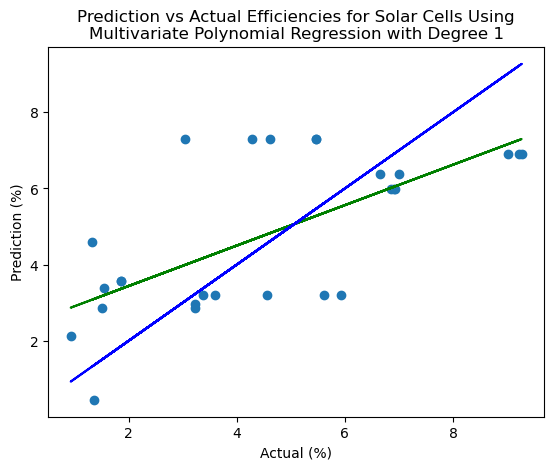

R Value: 0.6660133157910396
R-Squared: 0.44357373681097506
Std-Err: 0.11888756484855899
Intercept: 15.607192551944095


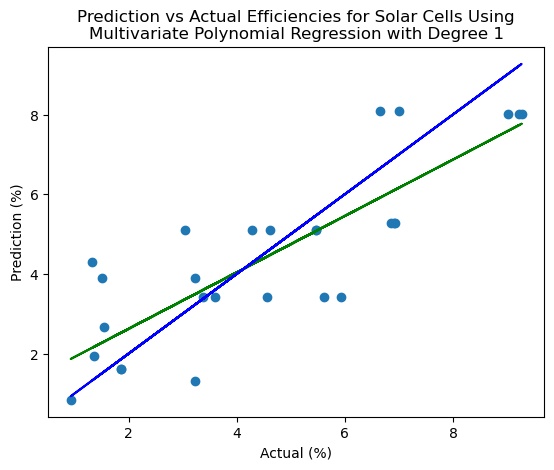

R Value: 0.8308480889045943
R-Squared: 0.6903085468364166
Std-Err: 0.09479068891768234
Intercept: 9.34325541791858


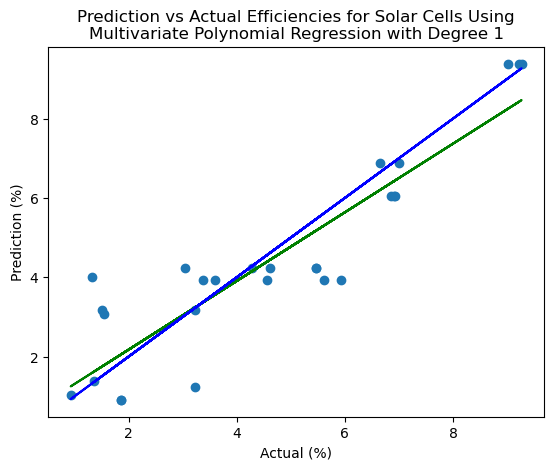

R Value: 0.9035338164021743
R-Squared: 0.8163733573822781
Std-Err: 0.08209027241726752
Intercept: 10.590302040124032


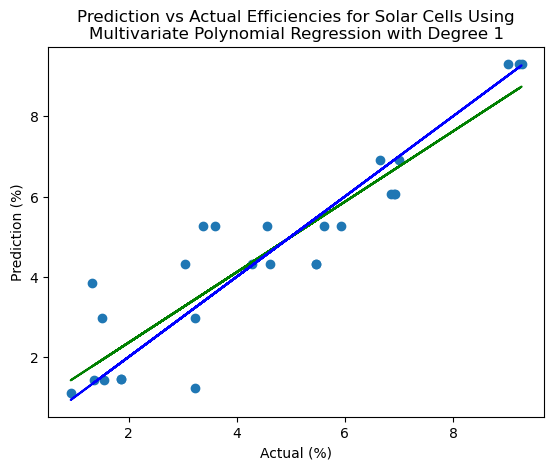

R Value: 0.9180357285078597
R-Squared: 0.8427895988169568
Std-Err: 0.07582910867967792
Intercept: 11037039838.126207


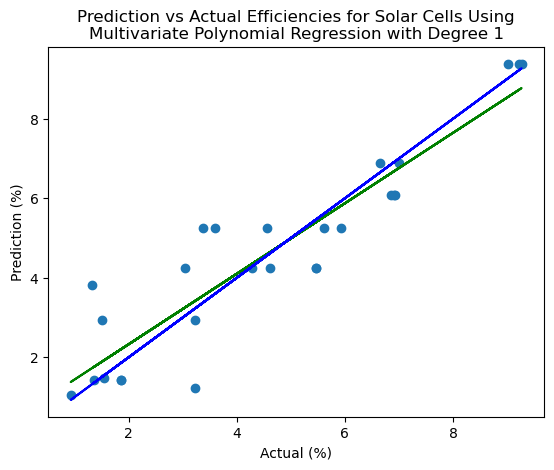

R Value: 0.9184232768640735
R-Squared: 0.8435013154857427
Std-Err: 0.0763544126674245
Intercept: -31.24030389517378


In [13]:
for i in range(1, 6):
    poly = PolynomialFeatures(degree=i)
    poly_variables = poly.fit_transform(X)
    poly_var_train, poly_var_test, res_train, res_test = train_test_split(poly_variables, y, test_size = splitRatio, random_state = 4)
    regression = linear_model.LinearRegression()
    model = regression.fit(poly_var_train, res_train)
    score = model.score(poly_var_test, res_test)
    prediction = model.predict(poly_var_test)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(res_test, prediction)
    mse = metrics.mean_squared_error(res_test, prediction)
    rmse = math.sqrt(mse)
    plt.figure()
    plt.scatter(res_test,prediction)
    plt.title("Prediction vs Actual Efficiencies for Solar Cells Using\nMultivariate Polynomial Regression with Degree 1")
    plt.xlabel("Actual (%)")
    plt.ylabel("Prediction (%)")
    plt.plot(res_test, slope*res_test + intercept, color='green', label="Actual")
    plt.plot(res_test, res_test, color='blue', label="Optimal")
    plt.show()
    #print(score)
    print("R Value: " + str(r_value))
    print("R-Squared: " + str(r_value*r_value))
    print("Std-Err: " + str(std_err))
    print("Intercept: " + str(model.intercept_))

R Value: 0.6660133157910396
R-Squared: 0.44357373681097506
Std-Err: 0.11888756484855899
Intercept: 15.607192551944095
------------------------------
R Value: 0.8308480889045943
R-Squared: 0.6903085468364166
Std-Err: 0.09479068891768234
Intercept: 9.34325541791858
------------------------------
R Value: 0.9035338164021743
R-Squared: 0.8163733573822781
Std-Err: 0.08209027241726752
Intercept: 10.590302040124032
------------------------------
R Value: 0.9180357285078597
R-Squared: 0.8427895988169568
Std-Err: 0.07582910867967792
Intercept: 11037039838.126207
------------------------------
R Value: 0.9184232768640735
R-Squared: 0.8435013154857427
Std-Err: 0.0763544126674245
Intercept: -31.24030389517378
------------------------------


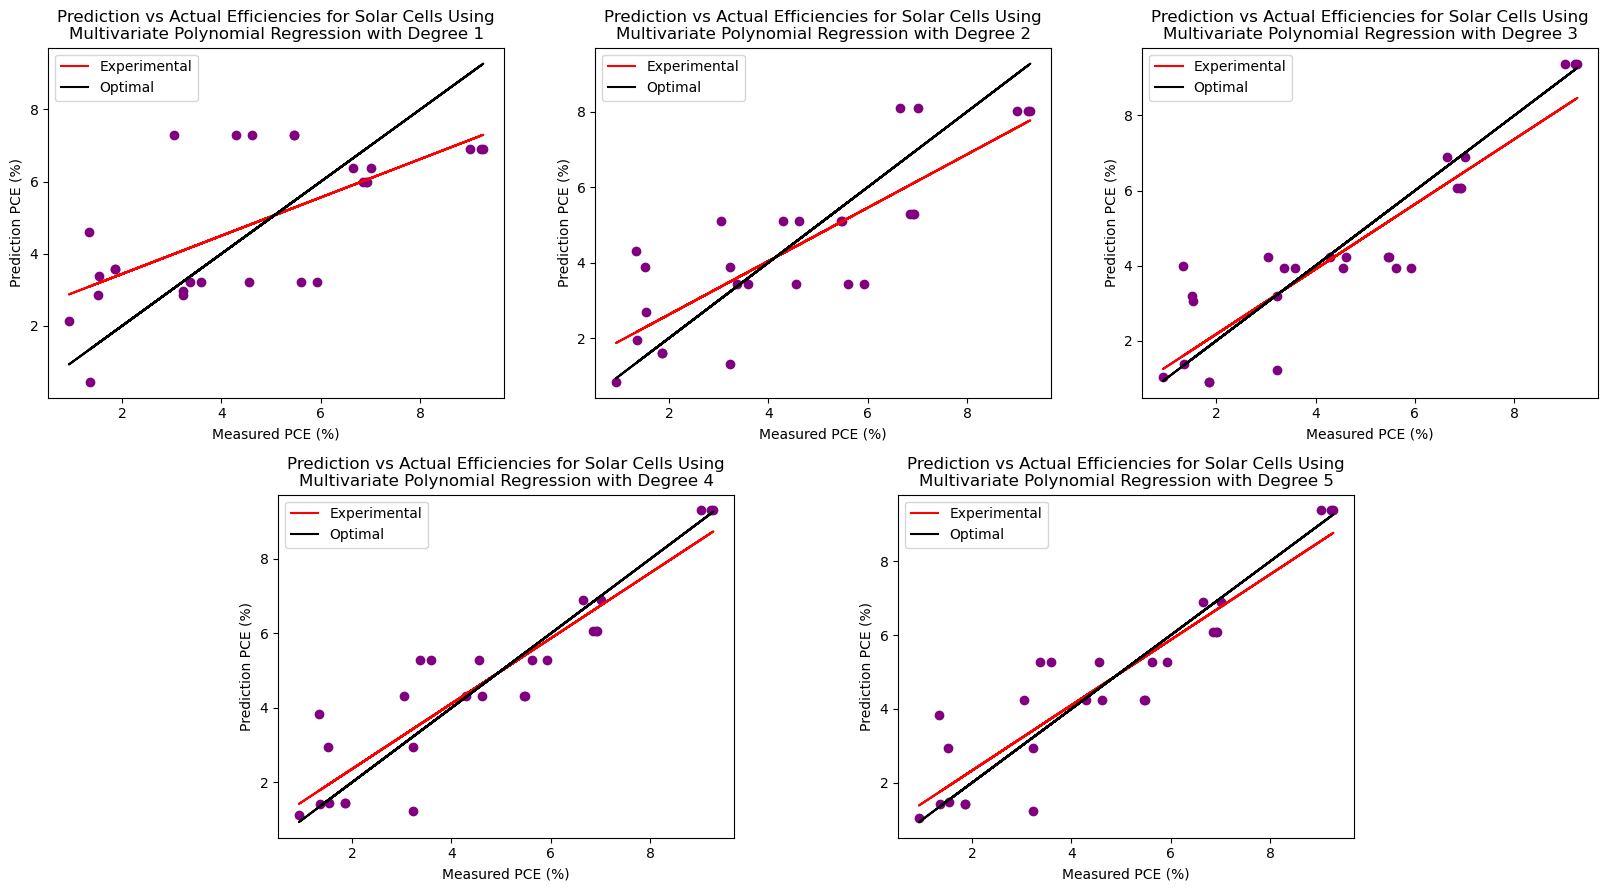

In [18]:
rSquaredXVals = [1, 2, 3, 4, 5]
rSquaredVals = []
fig, ax = plt.subplots(2,3, figsize=(20,10))
ax[1][2].set_visible(False)
ax[1][0].set_position([0.24,0.09,0.228,0.343])
ax[1][1].set_position([0.55,0.09,0.228,0.343])
counter = 0
for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    poly_variables = poly.fit_transform(X)
    poly_var_train, poly_var_test, res_train, res_test = train_test_split(poly_variables, y, test_size = splitRatio, random_state = 4)
    regression = linear_model.LinearRegression()
    model = regression.fit(poly_var_train, res_train)
    score = model.score(poly_var_test, res_test)
    prediction = model.predict(poly_var_test)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(res_test, prediction)
    mse = metrics.mean_squared_error(res_test, prediction)
    rmse = math.sqrt(mse)


    ax[int(counter / 3), (counter % 3)].scatter(res_test,prediction, color='purple')
    ax[int(counter / 3), (counter % 3)].plot(res_test, slope*res_test + intercept, color='red', label="Experimental")
    ax[int(counter / 3), (counter % 3)].plot(res_test, res_test, color='black', label="Optimal")
    ax[int(counter / 3), (counter % 3)].set_title("Prediction vs Actual Efficiencies for Solar Cells Using\nMultivariate Polynomial Regression with Degree " + str(i))
    ax[int(counter / 3), (counter % 3)].set_ylabel("Prediction PCE (%)")
    ax[int(counter / 3), (counter % 3)].set_xlabel("Measured PCE (%)")
    ax[int(counter / 3), (counter % 3)].legend()
    print("R Value: " + str(r_value))
    print("R-Squared: " + str(r_value*r_value))
    rSquaredVals.append(r_value*r_value)
    print("Std-Err: " + str(std_err))
    print("Intercept: " + str(model.intercept_))
    print('-'*30)
    counter += 1
    
plt.show()

(0.0, 1.0)

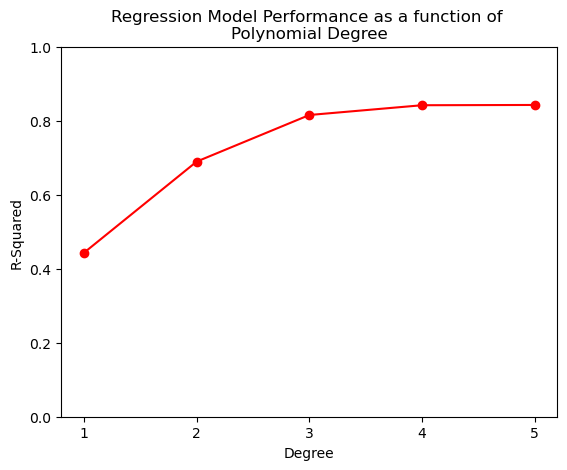

In [19]:
#rSquaredXVals = [1, 2, 3, 4, 5]
#rSquaredVals = [0.44357373681097506,0.6903085468364166,0.8163733573822781,0.8427895988169568,0.8435013154857427]
plt.plot(rSquaredXVals, rSquaredVals, color='red')
plt.scatter(rSquaredXVals, rSquaredVals, color='red')
plt.title("Regression Model Performance as a function of \nPolynomial Degree")
plt.xlabel("Degree")
plt.ylabel("R-Squared")
plt.xticks(np.arange(min(rSquaredXVals), max(rSquaredXVals)+1, 1.0))
plt.ylim(0, 1)

In [31]:
new_df = pd.read_csv('newData.csv')
new_df = new_df.drop(['Subset'], axis=1)
frames = [dataset, new_df]
mergedDf = pd.concat(frames)
shuffledDF = mergedDf.sample(frac = 1)
shuffledDF = shuffledDF.drop(['devices'], axis=1)

print(shuffledDF)

X = shuffledDF.iloc[:, 1:-1].values
y = shuffledDF.iloc[:, -1].values

splitRatio = 0.25

    Temperature  Speed  Distance  Pressure  Efficiency
28           70    200         7         0        3.89
92           70    150         5         0        3.67
42           55    165         7         7        4.10
26           55    135         5         3        6.18
49           50    150         7         3        6.44
..          ...    ...       ...       ...         ...
99           70    150         6         0        1.77
20           50    195         5         2        2.65
10           70    125         7         0        1.54
34           50    150         7         0        6.00
22           70    200         7         0        2.37

[156 rows x 5 columns]


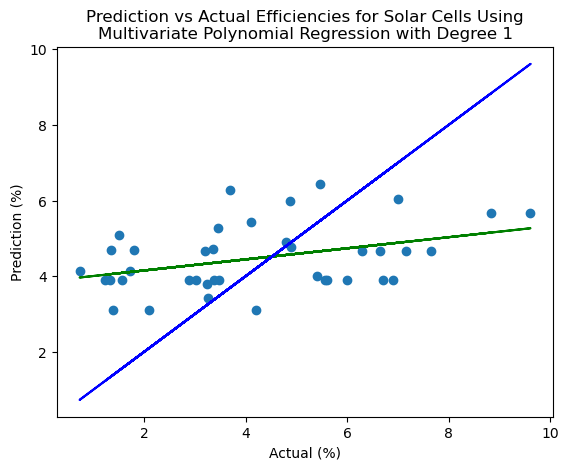

R Value: 0.3858310715243375
R-Squared: 0.14886561575361842
Std-Err: 0.05763335024642599
Intercept: 7.048679816551696


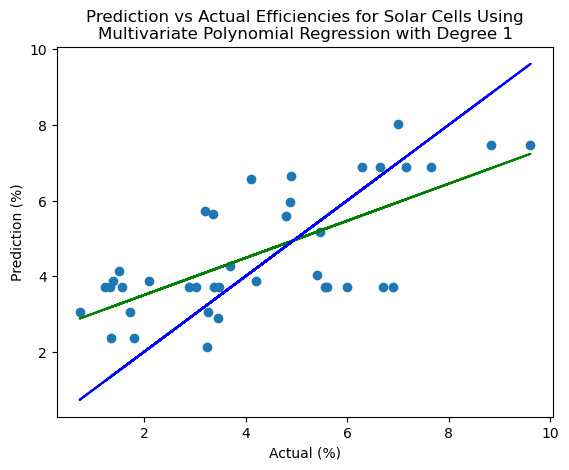

R Value: 0.6910661409146277
R-Squared: 0.4775724111186361
Std-Err: 0.08431151484554095
Intercept: -26.709425750152704


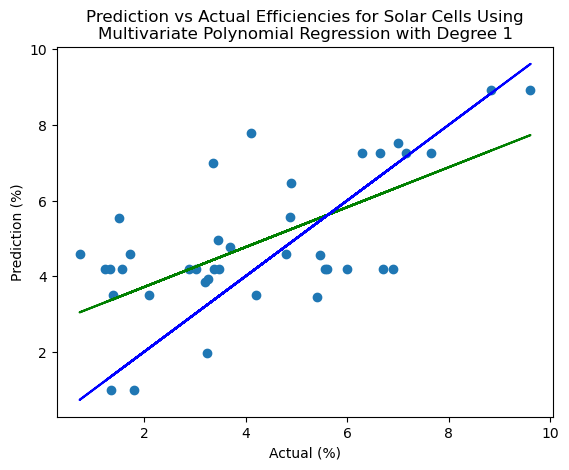

R Value: 0.6450051808121958
R-Squared: 0.4160316832745734
Std-Err: 0.10277180278320212
Intercept: 113.22609685882016


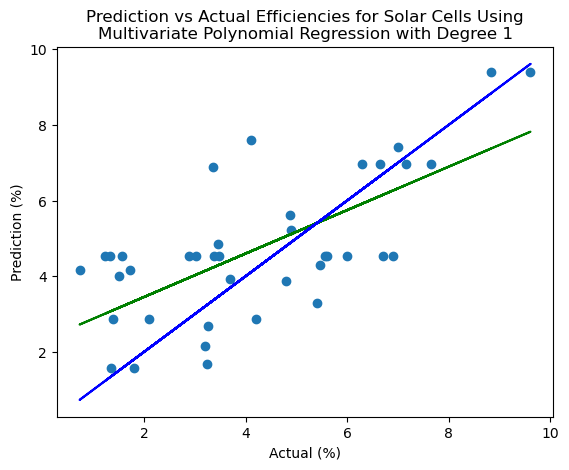

R Value: 0.6843516440538807
R-Squared: 0.46833717271924946
Std-Err: 0.10054633143724691
Intercept: 794.5697539634399


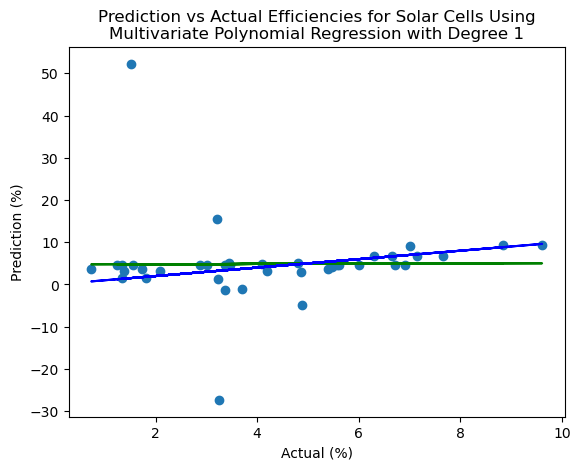

R Value: 0.006243066656338606
R-Squared: 3.8975881275486904e-05
Std-Err: 0.7075835476323055
Intercept: 1232.5665830963344


In [32]:
for i in range(1, 6):
    poly = PolynomialFeatures(degree=i)
    poly_variables = poly.fit_transform(X)
    poly_var_train, poly_var_test, res_train, res_test = train_test_split(poly_variables, y, test_size = splitRatio, random_state = 4)
    regression = linear_model.LinearRegression()
    model = regression.fit(poly_var_train, res_train)
    score = model.score(poly_var_test, res_test)
    prediction = model.predict(poly_var_test)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(res_test, prediction)
    mse = metrics.mean_squared_error(res_test, prediction)
    rmse = math.sqrt(mse)
    plt.figure()
    plt.scatter(res_test,prediction)
    plt.title("Prediction vs Actual Efficiencies for Solar Cells Using\nMultivariate Polynomial Regression with Degree 1")
    plt.xlabel("Actual (%)")
    plt.ylabel("Prediction (%)")
    plt.plot(res_test, slope*res_test + intercept, color='green', label="Actual")
    plt.plot(res_test, res_test, color='blue', label="Optimal")
    plt.show()
    #print(score)
    print("R Value: " + str(r_value))
    print("R-Squared: " + str(r_value*r_value))
    print("Std-Err: " + str(std_err))
    print("Intercept: " + str(model.intercept_))